<a href="https://colab.research.google.com/github/kareemullah123456789/big_data_advanced/blob/main/section_4_broadcast_canada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from pyspark.sql import SparkSession
 import pyspark.sql.functions as F
 spark = SparkSession.builder.getOrCreate()

In [2]:
my_grocery_list = [
    ["Banana", 2, 1.74],
    ["Apple", 4, 2.04],
    ["Carrot", 1, 1.09],
    ["Cake", 1, 10.99],
 ]

In [3]:
df_grocery_list = spark.createDataFrame(
    my_grocery_list, ["Item", "Quantity", "Price"]
 )

In [4]:
df_grocery_list.printSchema()

root
 |-- Item: string (nullable = true)
 |-- Quantity: long (nullable = true)
 |-- Price: double (nullable = true)



In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
!ls /content/drive/MyDrive/cde_data/broadcast_logs


# Example: accessing a file
#file_path = '/content/drive/MyDrive/cde_data/broadcast_logs/your_file.csv'


 BroadcastLogs_2018_Q3_M8_sample.CSV  'data dictionary.doc'
 Call_Signs.csv			       ReferenceTables


In [18]:
!ls /content/drive/MyDrive/cde_data/broadcast_logs

 BroadcastLogs_2018_Q3_M8_sample.CSV  'data dictionary.doc'
 Call_Signs.csv			       ReferenceTables


In [7]:
"""Checkpoint code for the book Data Analysis with Python and PySpark, Chapter 4."""

import os
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

spark = SparkSession.builder.getOrCreate()

DIRECTORY = "/content/drive/MyDrive/cde_data/broadcast_logs"
logs = (
    spark.read.csv(
        os.path.join(DIRECTORY, "BroadcastLogs_2018_Q3_M8_sample.CSV"),
        sep="|",
        header=True,
        inferSchema=True,
        timestampFormat="yyyy-MM-dd",
    )
    .drop("BroadcastLogID", "SequenceNO")
    .withColumn(
        "duration_seconds",
        (
            F.col("Duration").substr(1, 2).cast("int") * 60 * 60
            + F.col("Duration").substr(4, 2).cast("int") * 60
            + F.col("Duration").substr(7, 2).cast("int")
        ),
    )
)

logs.show()

+------------+----------+-------------------+----------------------+----------+---------------+-----------------+----------------+---------------+------------------+--------------+--------------------+------------+----------------+----------------+------------+------------+--------------------+----------------+--------+--------------------+------------------+----------------------+-------------+---------+---------+---------+---------+----------------+
|LogServiceID|   LogDate|AudienceTargetAgeID|AudienceTargetEthnicID|CategoryID|ClosedCaptionID|CountryOfOriginID|DubDramaCreditID|EthnicProgramID|ProductionSourceID|ProgramClassID|FilmClassificationID|ExhibitionID|        Duration|         EndTime|LogEntryDate|ProductionNO|        ProgramTitle|       StartTime|Subtitle|NetworkAffiliationID|SpecialAttentionID|BroadcastOriginPointID|CompositionID|Producer1|Producer2|Language1|Language2|duration_seconds|
+------------+----------+-------------------+----------------------+----------+---------

In [20]:
!ls /content/drive/MyDrive/cde_data/broadcast_logs

 BroadcastLogs_2018_Q3_M8_sample.CSV  'data dictionary.doc'
 Call_Signs.csv			       ReferenceTables


In [8]:
#  commercials.py #############################################################
#
# This program computes the commercial ratio for each channel present in the
# dataset.
#
###############################################################################

import os

import pyspark.sql.functions as F
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName(
    "Getting the Canadian TV channels with the highest/lowest proportion of commercials."
).getOrCreate()

spark.sparkContext.setLogLevel("WARN")

###############################################################################
# Reading all the relevant data sources
###############################################################################

DIRECTORY = "/content/drive/MyDrive/cde_data/broadcast_logs"

logs = spark.read.csv(
    os.path.join(DIRECTORY, "BroadcastLogs_2018_Q3_M8_sample.CSV"),
    sep="|",
    header=True,
    inferSchema=True,
)
logs.printSchema()


root
 |-- BroadcastLogID: integer (nullable = true)
 |-- LogServiceID: integer (nullable = true)
 |-- LogDate: date (nullable = true)
 |-- SequenceNO: integer (nullable = true)
 |-- AudienceTargetAgeID: integer (nullable = true)
 |-- AudienceTargetEthnicID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- ClosedCaptionID: integer (nullable = true)
 |-- CountryOfOriginID: integer (nullable = true)
 |-- DubDramaCreditID: integer (nullable = true)
 |-- EthnicProgramID: integer (nullable = true)
 |-- ProductionSourceID: integer (nullable = true)
 |-- ProgramClassID: integer (nullable = true)
 |-- FilmClassificationID: integer (nullable = true)
 |-- ExhibitionID: integer (nullable = true)
 |-- Duration: timestamp (nullable = true)
 |-- EndTime: timestamp (nullable = true)
 |-- LogEntryDate: date (nullable = true)
 |-- ProductionNO: string (nullable = true)
 |-- ProgramTitle: string (nullable = true)
 |-- StartTime: timestamp (nullable = true)
 |-- Subtitle: string (

In [9]:
log_identifier = spark.read.csv(
    "/content/drive/MyDrive/cde_data/broadcast_logs/ReferenceTables/LogIdentifier.csv",
    sep="|",
    header=True,
    inferSchema=True,
)

log_identifier.show()

+---------------+------------+---------+
|LogIdentifierID|LogServiceID|PrimaryFG|
+---------------+------------+---------+
|           13ST|        3157|        1|
|         2000SM|        3466|        1|
|           70SM|        3883|        1|
|           80SM|        3590|        1|
|           90SM|        3470|        1|
|         9DAPTN|        3158|        1|
|         9DCFCF|        3159|        1|
|         9DCFRN|        3160|        1|
|         9DCHRO|        3161|        1|
|         9DCIVI|        3162|        1|
|         9DCJCH|        3163|        1|
|         9DCJOH|        3164|        1|
|         9DCKCK|        3165|        1|
|         9DCKCW|        3166|        1|
|         9DCKVR|        3167|        1|
|          9DCKY|        3168|        1|
|         9DLEAF|        3169|        1|
|          9DMC2|        3170|        1|
|         9DMPIX|        3171|        1|
|         9DMUCH|        3172|        1|
+---------------+------------+---------+
only showing top

In [10]:
cd_category = spark.read.csv(
    "/content/drive/MyDrive/cde_data/broadcast_logs/ReferenceTables/CD_Category.csv",
    sep="|",
    header=True,
    inferSchema=True,
).select(
    "CategoryID",
    "CategoryCD",
    F.col("EnglishDescription").alias("Category_Description"),
)

cd_category.printSchema()

root
 |-- CategoryID: integer (nullable = true)
 |-- CategoryCD: string (nullable = true)
 |-- Category_Description: string (nullable = true)



In [11]:
cd_category.show()

+----------+----------+--------------------+
|CategoryID|CategoryCD|Category_Description|
+----------+----------+--------------------+
|         1|       010|                NEWS|
|         2|       02 |CANREC  ANALYSIS ...|
|         3|       02A|ANALYSIS AND INTE...|
|         4|       02B|LONG-FORM DOCUMEN...|
|         5|       030|REPORTING & ACTUA...|
|         6|       040|            RELIGION|
|         7|       05A|    EDUCATION FORMAL|
|         8|       05B|  EDUCATION INFORMAL|
|         9|       06A|SPORTS - PROFESSI...|
|        10|       06B|SPORTS - AMATEUR ...|
|        11|       07A|ONGOING DRAMATIC ...|
|        12|       07B|ONGOING COMEDY SE...|
|        13|       07C|SPECIALS,MINI-SER...|
|        14|       07D|DRAMA- FEATURE FILMS|
|        15|       07E|     DRAMA- ANIMATED|
|        16|       07F|PROGRAMS OF COMED...|
|        17|       07G|               OTHER|
|        18|       08A|       MUSIC - DANCE|
|        19|       08B|MUSIC - DANCE - M...|
|        2

In [12]:




cd_program_class = spark.read.csv(
    "/content/drive/MyDrive/cde_data/broadcast_logs/ReferenceTables/CD_ProgramClass.csv",
    sep="|",
    header=True,
    inferSchema=True,
).select(
    "ProgramClassID",
    "ProgramClassCD",
    F.col("EnglishDescription").alias("ProgramClass_Description"),
)


cd_program_class.show()

+--------------+--------------+------------------------+
|ProgramClassID|ProgramClassCD|ProgramClass_Description|
+--------------+--------------+------------------------+
|             1|          AUT |           AUTOPROMOTION|
|             2|          BAL |     BALANCE PROGRAMMING|
|             3|          COM |      COMMERCIAL MESSAGE|
|             4|          COR |             CORNERSTONE|
|             5|          DOC |             DOCUMENTARY|
|             6|          GIA |               GIVEAWAYS|
|             7|          ID  |    NETWORK IDENTIFIC...|
|             8|          INT |            INTERSTITIAL|
|             9|          LOC |       LOCAL ADVERTISING|
|            10|          MAG |        MAGAZINE PROGRAM|
|            11|          MER |           MERCHANDISING|
|            12|          MVC |        MUSIC VIDEO CLIP|
|            13|          NRN |    No recognized nat...|
|            14|          OFF |    SCHEDULED OFF AIR...|
|            15|          OFT |

In [13]:
###############################################################################
# Data processing
###############################################################################

logs = logs.drop("BroadcastLogID", "SequenceNO")

logs = logs.withColumn(
    "duration_seconds",
    (
        F.col("Duration").substr(1, 2).cast("int") * 60 * 60
        + F.col("Duration").substr(4, 2).cast("int") * 60
        + F.col("Duration").substr(7, 2).cast("int")
    ),
)


logs.show()

+------------+----------+-------------------+----------------------+----------+---------------+-----------------+----------------+---------------+------------------+--------------+--------------------+------------+-------------------+-------------------+------------+------------+--------------------+-------------------+--------+--------------------+------------------+----------------------+-------------+---------+---------+---------+---------+----------------+
|LogServiceID|   LogDate|AudienceTargetAgeID|AudienceTargetEthnicID|CategoryID|ClosedCaptionID|CountryOfOriginID|DubDramaCreditID|EthnicProgramID|ProductionSourceID|ProgramClassID|FilmClassificationID|ExhibitionID|           Duration|            EndTime|LogEntryDate|ProductionNO|        ProgramTitle|          StartTime|Subtitle|NetworkAffiliationID|SpecialAttentionID|BroadcastOriginPointID|CompositionID|Producer1|Producer2|Language1|Language2|duration_seconds|
+------------+----------+-------------------+----------------------+--

In [14]:
log_identifier = log_identifier.where(F.col("PrimaryFG") == 1)

In [15]:
log_identifier.show()

+---------------+------------+---------+
|LogIdentifierID|LogServiceID|PrimaryFG|
+---------------+------------+---------+
|           13ST|        3157|        1|
|         2000SM|        3466|        1|
|           70SM|        3883|        1|
|           80SM|        3590|        1|
|           90SM|        3470|        1|
|         9DAPTN|        3158|        1|
|         9DCFCF|        3159|        1|
|         9DCFRN|        3160|        1|
|         9DCHRO|        3161|        1|
|         9DCIVI|        3162|        1|
|         9DCJCH|        3163|        1|
|         9DCJOH|        3164|        1|
|         9DCKCK|        3165|        1|
|         9DCKCW|        3166|        1|
|         9DCKVR|        3167|        1|
|          9DCKY|        3168|        1|
|         9DLEAF|        3169|        1|
|          9DMC2|        3170|        1|
|         9DMPIX|        3171|        1|
|         9DMUCH|        3172|        1|
+---------------+------------+---------+
only showing top

In [16]:
logs.show()

+------------+----------+-------------------+----------------------+----------+---------------+-----------------+----------------+---------------+------------------+--------------+--------------------+------------+-------------------+-------------------+------------+------------+--------------------+-------------------+--------+--------------------+------------------+----------------------+-------------+---------+---------+---------+---------+----------------+
|LogServiceID|   LogDate|AudienceTargetAgeID|AudienceTargetEthnicID|CategoryID|ClosedCaptionID|CountryOfOriginID|DubDramaCreditID|EthnicProgramID|ProductionSourceID|ProgramClassID|FilmClassificationID|ExhibitionID|           Duration|            EndTime|LogEntryDate|ProductionNO|        ProgramTitle|          StartTime|Subtitle|NetworkAffiliationID|SpecialAttentionID|BroadcastOriginPointID|CompositionID|Producer1|Producer2|Language1|Language2|duration_seconds|
+------------+----------+-------------------+----------------------+--

In [17]:


logs_and_channels = logs.join(log_identifier, "LogServiceID")

In [18]:
logs_and_channels.printSchema()

root
 |-- LogServiceID: integer (nullable = true)
 |-- LogDate: date (nullable = true)
 |-- AudienceTargetAgeID: integer (nullable = true)
 |-- AudienceTargetEthnicID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- ClosedCaptionID: integer (nullable = true)
 |-- CountryOfOriginID: integer (nullable = true)
 |-- DubDramaCreditID: integer (nullable = true)
 |-- EthnicProgramID: integer (nullable = true)
 |-- ProductionSourceID: integer (nullable = true)
 |-- ProgramClassID: integer (nullable = true)
 |-- FilmClassificationID: integer (nullable = true)
 |-- ExhibitionID: integer (nullable = true)
 |-- Duration: timestamp (nullable = true)
 |-- EndTime: timestamp (nullable = true)
 |-- LogEntryDate: date (nullable = true)
 |-- ProductionNO: string (nullable = true)
 |-- ProgramTitle: string (nullable = true)
 |-- StartTime: timestamp (nullable = true)
 |-- Subtitle: string (nullable = true)
 |-- NetworkAffiliationID: integer (nullable = true)
 |-- SpecialAttentio

In [19]:
full_log = logs_and_channels.join(cd_category, "CategoryID", how="left").join(
    cd_program_class, "ProgramClassID", how="left"
)

full_log.show()

+--------------+----------+------------+----------+-------------------+----------------------+---------------+-----------------+----------------+---------------+------------------+--------------------+------------+-------------------+-------------------+------------+------------+--------------------+-------------------+--------+--------------------+------------------+----------------------+-------------+---------+---------+---------+---------+----------------+---------------+---------+----------+--------------------+--------------+------------------------+
|ProgramClassID|CategoryID|LogServiceID|   LogDate|AudienceTargetAgeID|AudienceTargetEthnicID|ClosedCaptionID|CountryOfOriginID|DubDramaCreditID|EthnicProgramID|ProductionSourceID|FilmClassificationID|ExhibitionID|           Duration|            EndTime|LogEntryDate|ProductionNO|        ProgramTitle|          StartTime|Subtitle|NetworkAffiliationID|SpecialAttentionID|BroadcastOriginPointID|CompositionID|Producer1|Producer2|Language1|

In [20]:




full_log.groupby("LogIdentifierID").agg(
    F.sum(
        F.when(
            F.trim(F.col("ProgramClassCD")).isin(
                ["COM", "PRC", "PGI", "PRO", "LOC", "SPO", "MER", "SOL"]
            ),
            F.col("duration_seconds"),
        ).otherwise(0)
    ).alias("duration_commercial"),
    F.sum("duration_seconds").alias("duration_total"),
).withColumn(
    "commercial_ratio", F.col("duration_commercial") / F.col("duration_total")
).orderBy(
    "commercial_ratio", ascending=False
).show(
    1000, False
)

+---------------+-------------------+--------------+----------------+
|LogIdentifierID|duration_commercial|duration_total|commercial_ratio|
+---------------+-------------------+--------------+----------------+
|CJCO           |0                  |NULL          |NULL            |
|BRAVO          |0                  |NULL          |NULL            |
|CFTF           |0                  |NULL          |NULL            |
|CKCS           |0                  |NULL          |NULL            |
|CJNT           |0                  |NULL          |NULL            |
|CKES           |0                  |NULL          |NULL            |
|CHBX           |0                  |NULL          |NULL            |
|BBCKID         |0                  |NULL          |NULL            |
|BOOK           |0                  |NULL          |NULL            |
|CHAN           |0                  |NULL          |NULL            |
|CEVASI         |0                  |NULL          |NULL            |
|CMT            |0  

In [21]:
import os
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("Broadcast Logs") \
    .getOrCreate()

# Specify the file directory
DIRECTORY = "/content/drive/MyDrive/cde_data/broadcast_logs"

# Read the CSV file with the specified options
logs = spark.read.csv(
    os.path.join(DIRECTORY, "BroadcastLogs_2018_Q3_M8_sample.CSV"),
    sep="|",
    header=True,
    inferSchema=True,
    timestampFormat="yyyy-MM-dd"
)

# Show a few rows to confirm
logs.show(5)


+--------------+------------+----------+----------+-------------------+----------------------+----------+---------------+-----------------+----------------+---------------+------------------+--------------+--------------------+------------+----------------+----------------+------------+------------+--------------------+----------------+--------+--------------------+------------------+----------------------+-------------+---------+---------+---------+---------+
|BroadcastLogID|LogServiceID|   LogDate|SequenceNO|AudienceTargetAgeID|AudienceTargetEthnicID|CategoryID|ClosedCaptionID|CountryOfOriginID|DubDramaCreditID|EthnicProgramID|ProductionSourceID|ProgramClassID|FilmClassificationID|ExhibitionID|        Duration|         EndTime|LogEntryDate|ProductionNO|        ProgramTitle|       StartTime|Subtitle|NetworkAffiliationID|SpecialAttentionID|BroadcastOriginPointID|CompositionID|Producer1|Producer2|Language1|Language2|
+--------------+------------+----------+----------+-------------------

In [22]:
 logs.printSchema()

root
 |-- BroadcastLogID: integer (nullable = true)
 |-- LogServiceID: integer (nullable = true)
 |-- LogDate: date (nullable = true)
 |-- SequenceNO: integer (nullable = true)
 |-- AudienceTargetAgeID: integer (nullable = true)
 |-- AudienceTargetEthnicID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- ClosedCaptionID: integer (nullable = true)
 |-- CountryOfOriginID: integer (nullable = true)
 |-- DubDramaCreditID: integer (nullable = true)
 |-- EthnicProgramID: integer (nullable = true)
 |-- ProductionSourceID: integer (nullable = true)
 |-- ProgramClassID: integer (nullable = true)
 |-- FilmClassificationID: integer (nullable = true)
 |-- ExhibitionID: integer (nullable = true)
 |-- Duration: string (nullable = true)
 |-- EndTime: string (nullable = true)
 |-- LogEntryDate: date (nullable = true)
 |-- ProductionNO: string (nullable = true)
 |-- ProgramTitle: string (nullable = true)
 |-- StartTime: string (nullable = true)
 |-- Subtitle: string (nullable 

In [23]:
 logs.select("BroadcastLogID", "LogServiceID", "LogDate").show(5, False)

+--------------+------------+----------+
|BroadcastLogID|LogServiceID|LogDate   |
+--------------+------------+----------+
|1196192316    |3157        |2018-08-01|
|1196192317    |3157        |2018-08-01|
|1196192318    |3157        |2018-08-01|
|1196192319    |3157        |2018-08-01|
|1196192320    |3157        |2018-08-01|
+--------------+------------+----------+
only showing top 5 rows



In [25]:
# Using the string to column conversion
logs.select("BroadCastLogID", "LogServiceID", "LogDate")

DataFrame[BroadCastLogID: int, LogServiceID: int, LogDate: date]

In [26]:
logs.select(*["BroadCastLogID", "LogServiceID", "LogDate"])

DataFrame[BroadCastLogID: int, LogServiceID: int, LogDate: date]

In [27]:
 # Passing the column object explicitly
logs.select(
    F.col("BroadCastLogID"), F.col("LogServiceID"), F.col("LogDate")
 )

DataFrame[BroadCastLogID: int, LogServiceID: int, LogDate: date]

In [28]:



logs.select(
    *[F.col("BroadCastLogID"), F.col("LogServiceID"), F.col("LogDate")]
 )

DataFrame[BroadCastLogID: int, LogServiceID: int, LogDate: date]

In [29]:
import numpy as np

# Split columns into 3 roughly equal parts
column_split = np.array_split(np.array(logs.columns), len(logs.columns) // 3)

# Show first 5 rows of each split
for x in column_split:
    logs.select(*x).show(5, False)


+--------------+------------+----------+
|BroadcastLogID|LogServiceID|LogDate   |
+--------------+------------+----------+
|1196192316    |3157        |2018-08-01|
|1196192317    |3157        |2018-08-01|
|1196192318    |3157        |2018-08-01|
|1196192319    |3157        |2018-08-01|
|1196192320    |3157        |2018-08-01|
+--------------+------------+----------+
only showing top 5 rows

+----------+-------------------+----------------------+
|SequenceNO|AudienceTargetAgeID|AudienceTargetEthnicID|
+----------+-------------------+----------------------+
|1         |4                  |NULL                  |
|2         |NULL               |NULL                  |
|3         |NULL               |NULL                  |
|4         |NULL               |NULL                  |
|5         |NULL               |NULL                  |
+----------+-------------------+----------------------+
only showing top 5 rows

+----------+---------------+-----------------+
|CategoryID|ClosedCaptionID|Co

In [30]:
 logs = logs.drop("BroadcastLogID", "SequenceNO")

In [31]:
 print("BroadcastLogID" in logs.columns)  # => False
 print("SequenceNo" in logs.columns)  # => False

False
False


In [32]:
logs = logs.select(
    *[x for x in logs.columns if x not in ["BroadcastLogID", "SequenceNO"]]
 )

In [34]:
sample = spark.read.csv(
    "/content/drive/MyDrive/cde_data/sample_section_4/sample.csv",
    sep=",",
    header=True,         # Use a boolean, not a list
    quote='"',           # Default quote character is a double-quote; adjust if needed
    inferSchema=True     # Use a boolean, not a list
)


In [35]:
sample.show()

+--------+-----------+-----+
|    Item|   Quantity|Price|
+--------+-----------+-----+
| $Banana|   organic$|  1.0|
|    Pear|          7| 1.24|
|   $Cake| chocolate$|  1.0|
+--------+-----------+-----+



In [37]:
 sample.columns

['Item', 'Quantity', 'Price']

In [38]:
   logs.select(F.col("Duration")).show(5)

+----------------+
|        Duration|
+----------------+
|02:00:00.0000000|
|00:00:30.0000000|
|00:00:15.0000000|
|00:00:15.0000000|
|00:00:15.0000000|
+----------------+
only showing top 5 rows



In [39]:
 print(logs.select(F.col("Duration")).dtypes)

[('Duration', 'string')]


In [40]:
import pyspark.sql.functions as F

logs.select(
    F.col("Duration"),
    F.col("Duration").substr(1, 2).cast("int").alias("dur_hours"),
    F.col("Duration").substr(4, 2).cast("int").alias("dur_minutes"),
    F.col("Duration").substr(7, 2).cast("int").alias("dur_seconds")
).distinct().show(5)


+----------------+---------+-----------+-----------+
|        Duration|dur_hours|dur_minutes|dur_seconds|
+----------------+---------+-----------+-----------+
|00:04:52.0000000|        0|          4|         52|
|00:10:06.0000000|        0|         10|          6|
|00:26:41.0000000|        0|         26|         41|
|00:05:29.0000000|        0|          5|         29|
|00:08:18.0000000|        0|          8|         18|
+----------------+---------+-----------+-----------+
only showing top 5 rows



In [41]:
import pyspark.sql.functions as F

logs.select(
    F.col("Duration"),
    (
        F.col("Duration").substr(1, 2).cast("int") * 60 * 60 +
        F.col("Duration").substr(4, 2).cast("int") * 60 +
        F.col("Duration").substr(7, 2).cast("int")
    ).alias("Duration_seconds")
).distinct().show(5)


+----------------+----------------+
|        Duration|Duration_seconds|
+----------------+----------------+
|01:59:30.0000000|            7170|
|00:31:00.0000000|            1860|
|00:28:08.0000000|            1688|
|00:10:30.0000000|             630|
|00:32:00.0000000|            1920|
+----------------+----------------+
only showing top 5 rows



In [44]:
 logs = logs.withColumn(
    "Duration_seconds",
    (
 F.col("Duration").substr(1, 2).cast("int") * 60 * 60
 + F.col("Duration").substr(4, 2).cast("int") * 60
 + F.col("Duration").substr(7, 2).cast("int")
    ),
 )
logs.printSchema()

root
 |-- LogServiceID: integer (nullable = true)
 |-- LogDate: date (nullable = true)
 |-- AudienceTargetAgeID: integer (nullable = true)
 |-- AudienceTargetEthnicID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- ClosedCaptionID: integer (nullable = true)
 |-- CountryOfOriginID: integer (nullable = true)
 |-- DubDramaCreditID: integer (nullable = true)
 |-- EthnicProgramID: integer (nullable = true)
 |-- ProductionSourceID: integer (nullable = true)
 |-- ProgramClassID: integer (nullable = true)
 |-- FilmClassificationID: integer (nullable = true)
 |-- ExhibitionID: integer (nullable = true)
 |-- Duration: string (nullable = true)
 |-- EndTime: string (nullable = true)
 |-- LogEntryDate: date (nullable = true)
 |-- ProductionNO: string (nullable = true)
 |-- ProgramTitle: string (nullable = true)
 |-- StartTime: string (nullable = true)
 |-- Subtitle: string (nullable = true)
 |-- NetworkAffiliationID: integer (nullable = true)
 |-- SpecialAttentionID: inte

root
 |-- LogServiceID: integer (nullable = true)
 |-- LogDate: date (nullable = true)
 |-- AudienceTargetAgeID: integer (nullable = true)
 |-- AudienceTargetEthnicID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- ClosedCaptionID: integer (nullable = true)
 |-- CountryOfOriginID: integer (nullable = true)
 |-- DubDramaCreditID: integer (nullable = true)
 |-- EthnicProgramID: integer (nullable = true)
 |-- ProductionSourceID: integer (nullable = true)
 |-- ProgramClassID: integer (nullable = true)
 |-- FilmClassificationID: integer (nullable = true)
 |-- ExhibitionID: integer (nullable = true)
 |-- Duration: string (nullable = true)
 |-- EndTime: string (nullable = true)
 |-- LogEntryDate: date (nullable = true)
 |-- ProductionNO: string (nullable = true)
 |-- ProgramTitle: string (nullable = true)
 |-- StartTime: string (nullable = true)
 |-- Subtitle: string (nullable = true)
 |-- NetworkAffiliationID: integer (nullable = true)
 |-- SpecialAttentionID: inte

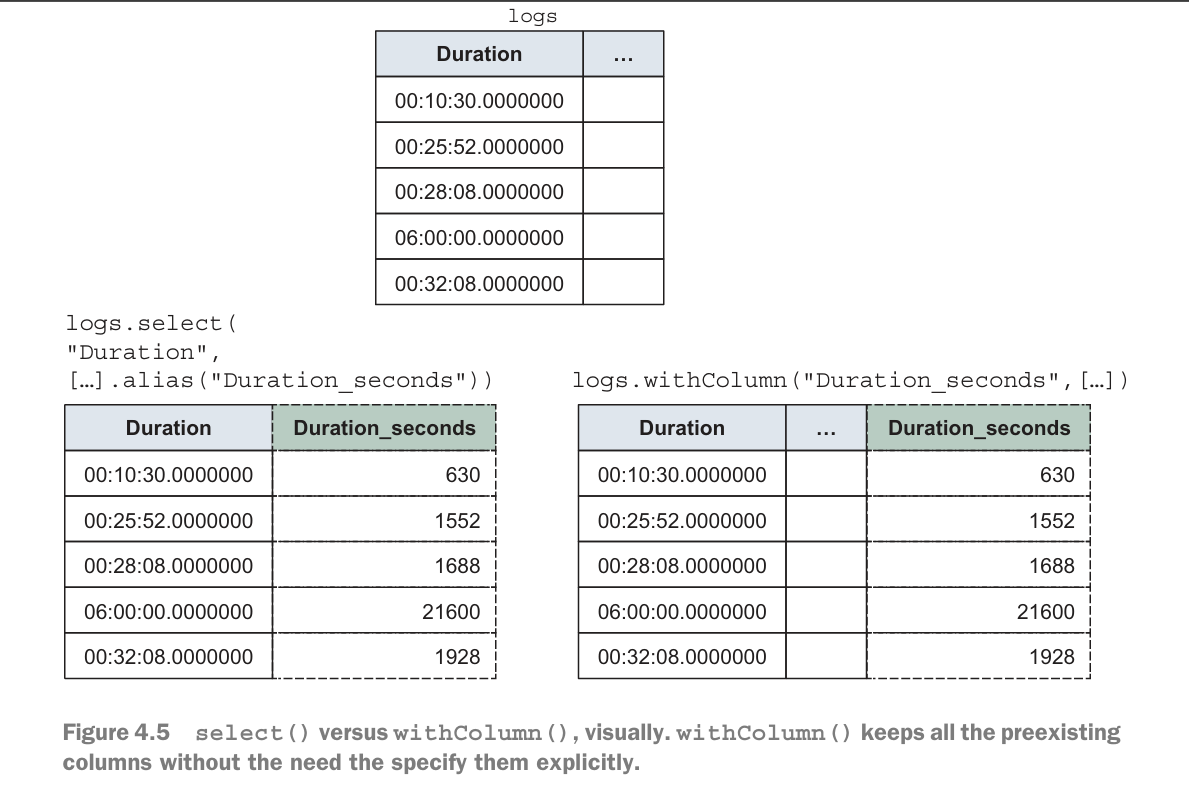

In [45]:
 logs = logs.withColumnRenamed("Duration_seconds", "duration_seconds")
 logs.printSchema()

root
 |-- LogServiceID: integer (nullable = true)
 |-- LogDate: date (nullable = true)
 |-- AudienceTargetAgeID: integer (nullable = true)
 |-- AudienceTargetEthnicID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- ClosedCaptionID: integer (nullable = true)
 |-- CountryOfOriginID: integer (nullable = true)
 |-- DubDramaCreditID: integer (nullable = true)
 |-- EthnicProgramID: integer (nullable = true)
 |-- ProductionSourceID: integer (nullable = true)
 |-- ProgramClassID: integer (nullable = true)
 |-- FilmClassificationID: integer (nullable = true)
 |-- ExhibitionID: integer (nullable = true)
 |-- Duration: string (nullable = true)
 |-- EndTime: string (nullable = true)
 |-- LogEntryDate: date (nullable = true)
 |-- ProductionNO: string (nullable = true)
 |-- ProgramTitle: string (nullable = true)
 |-- StartTime: string (nullable = true)
 |-- Subtitle: string (nullable = true)
 |-- NetworkAffiliationID: integer (nullable = true)
 |-- SpecialAttentionID: inte

In [46]:
logs.toDF(*[x.lower() for x in logs.columns]).printSchema()

root
 |-- logserviceid: integer (nullable = true)
 |-- logdate: date (nullable = true)
 |-- audiencetargetageid: integer (nullable = true)
 |-- audiencetargetethnicid: integer (nullable = true)
 |-- categoryid: integer (nullable = true)
 |-- closedcaptionid: integer (nullable = true)
 |-- countryoforiginid: integer (nullable = true)
 |-- dubdramacreditid: integer (nullable = true)
 |-- ethnicprogramid: integer (nullable = true)
 |-- productionsourceid: integer (nullable = true)
 |-- programclassid: integer (nullable = true)
 |-- filmclassificationid: integer (nullable = true)
 |-- exhibitionid: integer (nullable = true)
 |-- duration: string (nullable = true)
 |-- endtime: string (nullable = true)
 |-- logentrydate: date (nullable = true)
 |-- productionno: string (nullable = true)
 |-- programtitle: string (nullable = true)
 |-- starttime: string (nullable = true)
 |-- subtitle: string (nullable = true)
 |-- networkaffiliationid: integer (nullable = true)
 |-- specialattentionid: inte

In [47]:
 logs.select(sorted(logs.columns)).printSchema()

root
 |-- AudienceTargetAgeID: integer (nullable = true)
 |-- AudienceTargetEthnicID: integer (nullable = true)
 |-- BroadcastOriginPointID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- ClosedCaptionID: integer (nullable = true)
 |-- CompositionID: integer (nullable = true)
 |-- CountryOfOriginID: integer (nullable = true)
 |-- DubDramaCreditID: integer (nullable = true)
 |-- Duration: string (nullable = true)
 |-- EndTime: string (nullable = true)
 |-- EthnicProgramID: integer (nullable = true)
 |-- ExhibitionID: integer (nullable = true)
 |-- FilmClassificationID: integer (nullable = true)
 |-- Language1: integer (nullable = true)
 |-- Language2: integer (nullable = true)
 |-- LogDate: date (nullable = true)
 |-- LogEntryDate: date (nullable = true)
 |-- LogServiceID: integer (nullable = true)
 |-- NetworkAffiliationID: integer (nullable = true)
 |-- Producer1: string (nullable = true)
 |-- Producer2: string (nullable = true)
 |-- ProductionNO: string (nu

In [48]:
for i in logs.columns:
    logs.describe(i).show()

+-------+-----------------+
|summary|     LogServiceID|
+-------+-----------------+
|  count|           238945|
|   mean|3450.890284375065|
| stddev| 199.506739625561|
|    min|             3157|
|    max|             3925|
+-------+-----------------+

+-------+
|summary|
+-------+
|  count|
|   mean|
| stddev|
|    min|
|    max|
+-------+

+-------+-------------------+
|summary|AudienceTargetAgeID|
+-------+-------------------+
|  count|              16112|
|   mean| 3.4929245283018866|
| stddev| 1.0415963394745127|
|    min|                  1|
|    max|                  4|
+-------+-------------------+

+-------+----------------------+
|summary|AudienceTargetEthnicID|
+-------+----------------------+
|  count|                  1710|
|   mean|    120.56432748538012|
| stddev|     71.98694059436133|
|    min|                     4|
|    max|                   337|
+-------+----------------------+

+-------+------------------+
|summary|        CategoryID|
+-------+------------------+


In [49]:
for i in logs.columns:
    logs.select(i).summary().show()

+-------+-----------------+
|summary|     LogServiceID|
+-------+-----------------+
|  count|           238945|
|   mean|3450.890284375065|
| stddev| 199.506739625561|
|    min|             3157|
|    25%|             3287|
|    50%|             3379|
|    75%|             3627|
|    max|             3925|
+-------+-----------------+

+-------+
|summary|
+-------+
|  count|
|   mean|
| stddev|
|    min|
|    25%|
|    50%|
|    75%|
|    max|
+-------+

+-------+-------------------+
|summary|AudienceTargetAgeID|
+-------+-------------------+
|  count|              16112|
|   mean| 3.4929245283018866|
| stddev| 1.0415963394745127|
|    min|                  1|
|    25%|                  4|
|    50%|                  4|
|    75%|                  4|
|    max|                  4|
+-------+-------------------+

+-------+----------------------+
|summary|AudienceTargetEthnicID|
+-------+----------------------+
|  count|                  1710|
|   mean|    120.56432748538012|
| stddev|     71



---

### 📝 PySpark CSV Handling and DataFrame Basics

- **Reading Data:**
  - PySpark uses the `SparkReader` object to read any kind of data into a DataFrame.
  - The specialized `csv()` method of `SparkReader` is used to ingest CSV files.
  - The **only required parameter** is the source location (file path).

- **CSV Flexibility:**
  - CSV format is very flexible.
  - PySpark provides many optional parameters:
    - `sep` (field delimiter)
    - `lineSep` (record delimiter)
    - `quote` (quotation character)
  - These all have **sensible defaults**, but can be customized.

- **Schema Inference:**
  - Set `inferSchema=True` to allow PySpark to infer data types automatically.
  - PySpark reads the file **twice**:
    - Once to infer the schema.
    - Once to actually load the data.

- **DataFrame Structure:**
  - Tabular data in PySpark is represented as a **column-major** structure.
  - Each column has a **name** and a **type**.
  - The concept of **rows** is less relevant compared to columns.

- **Exploration and Column Handling:**
  - Columns can be accessed like a Python list: `df.columns`.
  - Common operations:
    - `select()` → Select and reorder columns.
    - `drop()` → Delete columns.
    - `withColumn()` → Create or modify columns.
    - `withColumnRenamed()` → Rename a single column.
    - `toDF()` → Rename all columns at once.

- **Data Summary:**
  - Use `describe()` for fixed metrics: count, mean, stddev, min, max.
  - Use `summary()` for more comprehensive statistics.

---

